## Import Unique Song Data

In [16]:
import pandas as pd
songs = pd.read_excel('Unique_Song_with_Lyrics.xlsx')


In [21]:
# Identify columns containing 'Unnamed' in their names
columns_to_drop = [col for col in songs.columns if 'Unnamed' in col]

# Drop these columns from the DataFrame
songs.drop(columns=columns_to_drop, inplace=True)

# **Rerieve Lyrics**

In [7]:
import re

def preprocess_lyrics(lyrics):
    if lyrics is None:
        return None
    # Remove identifiers like chorus, verse, etc
    lyrics = re.sub(r'\[(.*?)\]', ' ', lyrics)
    # Remove any non-alphabetic characters and convert to lowercase
    lyrics = re.sub(r'[^a-zA-Z\s]', '', lyrics).lower()
    lines = lyrics.split('\n')
    if 'contributor' in lines[0]:
        # Remove the first line
        lines = lines[1:]
    lyrics = '\n'.join(lines)
    return lyrics


In [1]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
import time
import lyricsgenius
start_time = time.time()

api_keys=["NUHHVpwnmbDYUYw8Padu0gQeHvYN4OsKYtE2MKNUpBUI6yR-xZXKY6S5NvCnFbiP", 
          "ok6jSM4Zhr7etnP8-FiP6YaB6UEaOJvp_X43ZJYPw1ArLWGeJJhUB_oLAjote8VO",
          "kDopH_BBuXwvGpT93kjyBTqKakQTU4mY-VabDbgc6rg4jUJR_kE0UmgF5bwlqSbz",
          "JQ50dQUwpc5sWW_VFvAcoGxEGZCX2Kd0NmVB3RWLhswxzowY9QKlXPaxpe4W1Kiz", 
          "MNzNHldmmNjuRn3bz0bMEEKqwnLZBpQWZkF-A8MZQT7VUhPm6d0OqDvI1Rt5yyVY",
          "Ct9MbwmryGtBJRvhFA-Ke-6NSGO8-rDoeFmOYrJfOIUdB-DjAgX13jCSlsl9ib35",
          "yvJPeY-tbU5Z1AxStEd6oQRMpotzi7aAnSKGiQGXrUf-6gEkFYzBqqz84wHvhgbi",
          "jxUrl5IIfu6y5l6Wwrhp336IuJBiKC2AOe6vW9q4KbzodfLeYu1t7OMeDBgKxvFD",
          "4qVv3mkoh5OWBRtRfKmBx5A0MR3Bdi9qIMjw4zpsQnGEvyJbC3hciyBt5F3YvQr3", 
          "seOHGnwVQmQ0-0C-ieCjkyP_DrznTPKNbXuD-UVTTwgVyi1VRMBNCPmqgQGOtecd",
          "Kx6FCZJ-Kg7toDS9jw5nEZjBZvagfLU2VRQgHW-Qb3tD_j0NVoVOui5TP9qBnDCd",
          "X5muKNwStX1-Cfp7GlPypnM18Tswc8MMWGJBdMZ1YXtllfoVJZu9D_K3GCz2Mcvb",
          "8mLpS6jPjkaeO53yI42lNNV-Un8ZNVlQAt7CDb35YO3af2Tm5Qq8ewmqIVXoLsHS",
          "n9c4ovnQ_qLUWaXTBQZ5srj2I7GlfO6fLg2a9BD3D7zS4LfA7NTH8CraOrE_iMdM", 
          "d3F3bL01efJaOqicXjH62HAPM0rThoDPgZREPsS9BksfBpjcQnjjc5XJ2yUxP4Kz", 
          "WDdUrhHESKqEjcwCbO62xyUpSVj8Lyj9lg2dhGTtuWrQyxXOab7hBB39TUQCbgYU", 
          "Vm4IrxqtgJJ51cN2G-T94Z3zB9Apjy7NoCy4sKKik8ochvDwyimXu_2j1wZSBX9Z",
          "NQxJj57IvcmhMe-aNLeccV0e252aJIx3LjkW0dfUTpVFwSauICpwhPPhWklXoyFc", 
          "CuAr9EDxD_jcevKIRWVdgmRzQUFMhtx9WKR3HEo8ZqXLFK519eRC4V3tl7adkuhZ", 
          "XotlkSOh-RRc6NyVMdyJjnG13okgQ0QcdL2qpfxVdZgx7HhcC7agviGA60xedyXT", 
          "OPxqDJ-iaTja3HUul8wjbpkN85a143mGUZ9CGM_RTJyqqoiaQ5CsrPfm0w1pJoO_", 
          "Au9sm66tQl4SHSMwKhTyfx6pvFuYSkN-EwNq2jpoIBPQIbj-nugK2OAdYb5HAf-v", 
          "XE7mKCmJTUbToEEab1JejuJSyTZdMs8CNj1kzTLJlFo43DJNfppug9EAEnOjiNlK", 
          "DIvqjDPHKbHb4ohl8O77WAMSH-aZR6VGdj580Cfav0IV74DkYRkabDCZUE3D582h", 
          "U_R7kDtw9Dg7jYK0G628zREfVWjlSdliCSSwcTUHgDpGso0UvUAqmQEtlCqtW10d", 
          "fnXmWOqYf9d0m1YEZ2t5KUNi8kTZihNfJiHSo9iz5pz3cSUyV0UJjrkZfRNn2XLe", 
          "CiNAQpYzoSCNiQiRAsvU-niX5CNbMtK1nRRLdN_HOiD3z5cIpQqf5LjaKxwvt8uS", 
          "3Txuk4tNvD60j0f6eM7MiuQfz7FC1mSWAo8stxNEk22BgTE5BvagbzPUhF1jdrF_",
            "6-UPhFh-pDa-lSSFT4Xp8cddcA_5PucGu5oCc4ufcOpdIMF1N6XuyVKb2HJmBaU2",
            "cyfhYMZrsY55RN4iKfzZCXVYKpKevI1wjzhcOsf897gz4Tx_RHvbC-fFOR76AJlB",
            "oie-UYTf99U5pphP3CH0QGxhEL0IDKk6v0zUZs2IvBewlf5hxLBwOVjlF_mBy16z",
            "tDI0rTs7OyjxtSgb6wr1D3hn2xyaFuPgW81o1n_4A0iSqmnpXIv1-AFMDPmmsZfv",
            "6CfFGxi72RyW-inMzG65hPxIFjfec2_wjPg2WYutew49QmzB8fNWnFy_JPPBvygN",
            "2bLN2bvcBmBkOvZEed_KSAMQaiCTWf5pgJ-8cw3vAakQpkA89i5l9hO51-jNMADt",
         "bOAhwYHIVWv2GYAoBUkMnZcReVzCWi9-JPJtPNIb_KLN43eVZxWE6t7yi5iCpRv1",
         "Qkqf5ZjVmmp15KrcEQ0eGFO6jULJJYgtJoioD91BTP_uQ7V-JNMJVvC8wJNEfHfz",
         "9a1UjbGo03h3QaAvs0Ez82dzVwzJpPNBZoQH0FI44OPqVKk0KuIwigFavSobnOdv",
         "xqpvuZjcwtZva_iD7F0J5Lwy0gloXqiH3mt4_BBa_VVgdNp8RnIiQBOlxrTmfbQj",
          "xqpvuZjcwtZva_iD7F0J5Lwy0gloXqiH3mt4_BBa_VVgdNp8RnIiQBOlxrTmfbQj",
         "0GpRTUP8MF68chCZ_UmwTfLo-9_XFKOS2lHxwk1yDUu8rjXj_nG79Yk1J_XjKiwW", 
          "_2MEd9p5GQe8e8_FD00DhIn8edb-LaKzhGoNTGbF11k5yU3xp5HmzZrMTNcKF-rp", 
          "gqWYoe0RSEIdZ7sbbugaaRF0Oe3fOOFTJvMgxWZWLer7sclenZXzTlGqIFhlDoau", 
          "hQTd-PpocAyasgbhEZeVaJTOw8gh-g0zqL9soxxlKuA7w8PFp9wPpXJxuk0syFW3", 
          "6UdwSPtN8oa9qG5MKTd-OV9muKfHTq5DPvkuxTYGyAy-tnsalc73N_D5tzQqqKRO", 
          "yPcwPcpsoABl81kHXeAUNmndll5fPoQwLlw558mDaVAW56m6yP4WPbFqlZscFCQq", 
          "yflqO7mYNg1J7caKJwRzADGm4aspHQn6PwRH-o9gxoiOwaWCwYpBrK5_dda5tkBy", 
          "pM9zxdJ48ed4ed3tJoXQFt-0Kk1XnKDp0jCbEN5Ni1jvAyxOPYL0xmXHY93o21z4", 
          "AAJjnJqKHQ_86ARW2lN_ZQbVXco756cgCNzIdH4Uh2735OPgybENPUJj89oZxcyp", 
          "l7aCHwA2ogAzvWl2xy1woVlaT-L01pIIsT9w11SQIHqi7IbjDuk5u2NfCXdTUpUn",
          "0DfAdf_jJKMhoFhr2otqryd-xDlVNNtPp23RfyS_PmQ0_RPnybWvH4uDP1NKm5re",
    "8fS7ECQJAwl8u2AanFyQIBXv7-Yhh35PCXFyZNV8eF0VpMk-nfcVceTH0lcG-lmb",
    "EsvtlB_b-Yg7arCcnT8dpOVLKoEqnSZeou3T2512I14Hf3F0M6GhLYoI8d28SyVF",
    "VO-rowxS67dz8Kb_uVScukXKIZr0Ppca0o_yY5mC2tSeYicnCMyUjNGtZLlg1uG5",
    "mCyfuRCqEpnU_BvRwit-W46fGZpvlIEdQ1FdmjSUWa8GOGvrmGxkVi1tseYISL_n",
    "Zj_BifC-ZtkK2Ggimry9v2JJwDVibYXFNo16ftxmOx8L5XOWO6n0c4jUmDs1c-AZ",
    "lj-0pw6W0t5K2jgS4cnk2ukSlZ9DTwECesR0E1IMw1k0RcELejYcLt_Ufbo2JS8q",
    "LhnCeR1st1BrEs2E2qWMhmHkvBwIzZW4osOZ8Rzyj1z2z1aJWA25YfE8YvSRc09z",
    "UGAUNws1-PIwpxrT1uBWv40O_iiHEioQG_CCo2nXYBF164TZA6Qb9erLwdWNDPB-",
    "UhBxX8Ca5sOYeEqCTQcwzQm6N-ntXFddPar098I1UTJ3jgNvXVkXRBzot1OHIqOT",
          'kN6knFi9fvt2v_0-FFOzTLGy3ajap_9C0UAPlIKrteGP-pZHwa_IyfFE2mBVk4gb',
    'wDwJcOXtZ1FBLFU4u4Ve9WcqCncz4KLz5a2xYAflSIG4TBTv2eEqnj4gotFjuVOy',
    'nxXEnwUX3hN8WzfYnT4R5AUd384VftiZTgDEMFmqCtkVPIA_ROTqow2x57XsrjRm',
    'bT_sjppQQj0RtXxBDttLjz64n-7AVVt8IEWooq1ipt5HOr7dd6dhcl1BvYjik67d',
    'jnC_ZyVWS5KAQTa6zVend5RW25HFkBZCf2ZWg83phU1T7074ovI1BRe0uLJk5sHW',
    'XF8iSN2agb0Up_haMLE6pNppExqtuqL6O-nuWoKGmrEIjcmzCQDasIW5u2DSHt5N',
    '87xj9MMZKdzL_eLEN1QvfTxXYPxoMaYwgvbknTX48bkuA7pL_yCYUz1xjS1xO7F4',
    'M2Y4i8iTnfNFTQZE2dFudrD13ZWCIrhMECv-dzw9FBadwEMlTr5z8na9EiMZvfGh'
          
]


def fetch_lyrics(api_key, row_index, song_title, artist_name):
    try:
        genius = lyricsgenius.Genius(api_key)
        song = genius.search_song(song_title, artist_name)
        if song:
            return (row_index, song.lyrics)
    except Exception as e:
        print(f"An error occurred while fetching lyrics for {song_title} by {artist_name}: {e}")
    return (row_index, None)

def get_lyrics_in_parallel(songs_df, api_keys):
    if 'lyrics' not in songs_df.columns:
        songs_df['lyrics'] = None

    with ThreadPoolExecutor(max_workers=len(api_keys)) as executor:
        futures = []
        for i, row in songs_df.iterrows():
            if pd.isnull(row['lyrics']):
                future = executor.submit(fetch_lyrics, api_keys[i % len(api_keys)], i, row['track_name'], row['artist_name'])
                futures.append(future)

        for future in as_completed(futures):
            row_index, lyrics = future.result()
            if lyrics:
                songs_df.at[row_index, 'lyrics'] = preprocess_lyrics(lyrics)

# Fetch and update lyrics in-place
get_lyrics_in_parallel(songs, api_keys)

# After this call, songs_df will have its 'lyrics' column updated where possible.
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

NameError: name 'songs' is not defined

In [22]:
songs

,track_name,artist_name,lyrics
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...
1,Du Og Jeg,Storm,du m hjelpe meg jeg blir gal\nfr flelsen av at...
2,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...
3,Kato,The Aubreys,older i know but can i still be bathed by you\...
4,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...
...,...,...,...
335259,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...
335260,Anesthetic Vapors,Goatpenis,NaN
335261,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...
335262,Stubborn,My Fictions,NaN


In [8]:
songs.to_excel('Unique_Song_With_Lyrics.xlsx')

In [7]:
test_10_rows=songs[['track_name', 'artist_name','lyrics']][:10]
test_10_rows

,track_name,artist_name,lyrics
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...
1,Du Og Jeg,Storm,du m hjelpe meg jeg blir gal\nfr flelsen av at...
2,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...
3,Kato,The Aubreys,older i know but can i still be bathed by you\...
4,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...
5,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...
6,WHERE MAN KNOWS WANT,The Armed,i cant fall asleep\na jukebox that only has on...
7,Bongoloid,Goto80,NaN
8,On Key - Audio Remix,Limewax,one two one two\n\nadam bainbridge\thello hi\n...
9,"Chop Chop, Goodbye",I Wrote Haikus About Cannibalism in Your Yearbook,NaN


In [23]:
import langdetect
from langdetect import detect_langs
from langdetect.lang_detect_exception import LangDetectException

lyrics_lang = []
for idx, row in songs.iterrows():
    # Skip language detection if lyrics are empty or None, but keep the row
    if not row[2] or pd.isna(row[2]):
        lyrics_lang.append(row)  # Keep rows with no lyrics
        continue
    try:
        langlist = detect_langs(row[2])
        # Check if the detected language is English with high probability
        if any(l.lang == 'en' and l.prob >= 0.95 for l in langlist):
            row['language'] = 'en'  # Optionally add 'en' to the 'language' column
            lyrics_lang.append(row)
            # print(idx)
    except LangDetectException:
        print(f'exception{idx}')  # Correctly format exception message
        continue

lyrics_lang = pd.DataFrame(lyrics_lang)
# Optionally save to CSV if needed
# lyrics_lang.to_csv('lyrics_lang_filtered.csv', index=False)

# Drop the 'language' column if you decide to keep it during processing
if 'language' in lyrics_lang.columns:
    lyrics_lang = lyrics_lang.drop('language', axis=1)

lyrics_lang = lyrics_lang.reset_index(drop=True)

# Display the number of unique values in each column
unique_counts = lyrics_lang.nunique()
print(unique_counts)


track_name     230832
artist_name     62277
lyrics         203928
dtype: int64


In [25]:
lyrics_lang.to_excel('Unique_Song_Eng_Lyrics.xlsx')

In [ ]:
# lyrics_lang.to_csv('lyrics_lang_raw.csv', index=False)
lyrics_lang = lyrics_lang.drop('language', axis = 1).reset_index(drop=True)
lyrics_lang.nunique()

# **Get Emotions of Lyrics**

In [3]:
import lyricsgenius
import requests
genius_client_id = "wZZ2RWc5mqp-5Pbz2W1rQJWE8LQ3pFBrb1Hw5_AOqgybq28mt7kjdjcG4zktCNbO"
genius_client_secret = "PefqBJHor_muDgTutGlaXXaxmzsI7TQCps9FQ3FwkUTT0WJIT3s0A5YA9mnFbfp_-CBhQF7b0omgE8kaM3dJ3w"
genius_access_token = "NUHHVpwnmbDYUYw8Padu0gQeHvYN4OsKYtE2MKNUpBUI6yR-xZXKY6S5NvCnFbiP"


genius = lyricsgenius.Genius("genius_access_token")

def get_lyrics(song_title, artist_name):
    try:
        song = genius.search_song(song_title, artist_name)
        if song:
            return song.lyrics
    except requests.exceptions.Timeout as e:
        # Handle timeout exceptions here
        print(f"Request timed out: {e}")
    except requests.exceptions.HTTPError as e:
        # Handle HTTP errors here
        print(f"HTTP error occurred: {e}")
    except requests.exceptions.ConnectionError as e:
        # Handle connection errors here
        print(f"Connection error occurred: {e}")
    except requests.exceptions.RequestException as e:
        # Handle any other request exceptions here
        print(f"An error occurred during the request: {e}")
    return None

# Example usage
lyrics = get_lyrics("SHUT MY EYES", "jeebanoff")
print(lyrics)

Searching for "SHUT MY EYES" by jeebanoff...
Done.
2 ContributorsSHUT MY EYES. Lyrics꿈만 같았던 시간은 다 지나갔지 벌써
널 내게서 지워야 내가 다시 살 수 있어
널 위해서 내가 사라져야겠어 이젠
너에게서 내가 아는 너를 기대할 수 없어

Every time I shut my eyes
이 속엔 네가 없어
If you see it in me
잔인하게 나를 등지고 서는

Every time I saw your eyes
그 속엔 내가 없어
이젠 알겠지 넌 더 이상
완벽하게 날 지웠어

Whenever shut my eyes
If you see it in me
Whenever saw your eyes
Now, whenever shut my eyes

Every time, Shut my eyes
바보 같은 내 모습이
Every time, Saw your eyes

꿈만 같았던 시간은 다 지나갔지 벌써
널 내게서 지워야 내가 다시 살 수 있어
널 위해서 내가 사라져야겠어 이젠
너에게서 어떤 말도 기대할 수 없어
You might also likeEvery time I shut my eyes
이 속엔 네가 없어
If you see it in me
잔인하게 나를 등지고 서는

Every time I saw your eyes
그 속엔 내가 없어
이젠 알겠지 넌 더 이상
완벽하게 날 지웠어

Whenever shut my eyes
(Whenever shut my eyes)
If you see it in me
Whenever saw your eyes
Now, whenever shut my eyesEmbed


In [11]:
lyrics = preprocess_lyrics(lyrics)

In [28]:
# Import required libraries
import matplotlib.pyplot as plt
from nrclex import NRCLex
from wordcloud import WordCloud, STOPWORDS


# Splitting the lyrics into lines for emotion analysis
lines = lyrics.split('\n')

# Emotion Analysis using NRCLex
emotion_scores = { 'fear': 0, 'anger': 0, 'anticip': 0, 'trust': 0, 'surprise': 0, 'positive': 0, 'negative': 0, 'sadness': 0, 'disgust': 0, 'joy': 0 }

for line in lines:
    if line.strip():  # Check if the line is not empty
        text_object = NRCLex(line)
        for emotion in emotion_scores.keys():
            emotion_scores[emotion] += text_object.affect_frequencies.get(emotion, 0)

# Normalizing the scores
total_lines = len([line for line in lines if line.strip()])
for emotion in emotion_scores:
    emotion_scores[emotion] /= total_lines

# Visualization - Bar Chart
emotions = list(emotion_scores.keys())
scores = list(emotion_scores.values())
print(emotions)
print(scores)
'''
plt.figure(figsize=(10, 6))
bars = plt.bar(emotions, scores, color='skyblue')

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Emotions')
plt.ylabel('Scores')
plt.title('Emotion Analysis of "your song choice"')
plt.xticks(rotation=45)
plt.show()

# Word Cloud Generation
# Define a set of words to exclude (common and explicit words)
explicit_stopwords = {'explicit1', 'explicit2', 'explicit3'}  # Replace with actual explicit words
stopwords = set(STOPWORDS).union(explicit_stopwords)

wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=stopwords, 
                      min_font_size=10).generate(lyrics)

# Displaying the Word Cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0)
plt.show()
'''

['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
[0.014227642276422762, 0.006097560975609756, 0.0, 0.038037166085946574, 0.03193960511033682, 0.18176538908246223, 0.044715447154471545, 0.03252032520325203, 0.0, 0.1289198606271777]


'\nplt.figure(figsize=(10, 6))\nbars = plt.bar(emotions, scores, color=\'skyblue\')\n\n# Adding value labels on each bar\nfor bar in bars:\n    yval = bar.get_height()\n    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha=\'center\', va=\'bottom\')\n\nplt.xlabel(\'Emotions\')\nplt.ylabel(\'Scores\')\nplt.title(\'Emotion Analysis of "your song choice"\')\nplt.xticks(rotation=45)\nplt.show()\n\n# Word Cloud Generation\n# Define a set of words to exclude (common and explicit words)\nexplicit_stopwords = {\'explicit1\', \'explicit2\', \'explicit3\'}  # Replace with actual explicit words\nstopwords = set(STOPWORDS).union(explicit_stopwords)\n\nwordcloud = WordCloud(width=800, height=800, \n                      background_color=\'white\', \n                      stopwords=stopwords, \n                      min_font_size=10).generate(lyrics)\n\n# Displaying the Word Cloud\nplt.figure(figsize=(8, 8), facecolor=None) \nplt.imshow(wordcloud) \nplt.axis("off") \nplt.tight_layou

In [12]:
lyrics

'       \n    \n      \n\nevery time i shut my eyes\n   \nif you see it in me\n   \n\nevery time i saw your eyes\n   \n    \n  \n\nwhenever shut my eyes\nif you see it in me\nwhenever saw your eyes\nnow whenever shut my eyes\n\nevery time shut my eyes\n   \nevery time saw your eyes\n\n     \n       \n    \n     \nyou might also likeevery time i shut my eyes\n   \nif you see it in me\n   \n\nevery time i saw your eyes\n   \n    \n  \n\nwhenever shut my eyes\nwhenever shut my eyes\nif you see it in me\nwhenever saw your eyes\nnow whenever shut my eyesembed'

In [14]:
from textblob import TextBlob

def analyze_sentiment(lyrics):
    blob = TextBlob(lyrics)
    return blob.sentiment

# Analyze sentiment of preprocessed lyrics
sentiment = analyze_sentiment(lyrics)
print(f"Sentiment polarity: {sentiment.polarity}, Sentiment subjectivity: {sentiment.subjectivity}")

# Polarity is a float within the range [-1.0, 1.0] where 1 means positive statement and -1 means a negative statement.
#Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

Sentiment polarity: 0.0, Sentiment subjectivity: 0.0


In [30]:
from transformers import XLNetModel, XLNetTokenizer
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class EmotionClassifier(nn.Module):
    def __init__(self, hidden_size=768, num_labels=4):
        super(EmotionClassifier, self).__init__()
        self.xlnet = XLNetModel.from_pretrained('xlnet-base-cased')
        self.sequence_summary = nn.Linear(hidden_size, 8)
        # Separate classifiers for Quadrant, Valence, Arousal
        self.classifier_quadrant = nn.Linear(8, num_labels)
        self.classifier_valence = nn.Linear(8, 1)
        self.classifier_arousal = nn.Linear(8, 1)

    def forward(self, input_ids, attention_mask):
        output = self.xlnet(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = output.last_hidden_state.mean(dim=1)
        sequence_summary = self.sequence_summary(sequence_output)
        
        # Multi-task classification
        logits_quadrant = self.classifier_quadrant(sequence_summary)
        logits_valence = self.classifier_valence(sequence_summary)
        logits_arousal = self.classifier_arousal(sequence_summary)
        
        return logits_quadrant, logits_valence, logits_arousal

# Tokenize the lyrics
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
#lyrics = "your lyrics here"  # replace with your lyrics
inputs = tokenizer(lyrics, return_tensors="pt", max_length=1024, truncation=True)

# Initialize the classifier and optimizer
model = EmotionClassifier()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Assume we have a function to get our data loader
# data_loader = get_data_loader()

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in data_loader:
        # Assume batch['input_ids'] and batch['attention_mask'] are provided by the data loader
        optimizer.zero_grad()
        logits_quadrant, logits_valence, logits_arousal = model(batch['input_ids'], batch['attention_mask'])
        # Compute the loss
        # Assume batch['quadrant_labels'], batch['valence_labels'], and batch['arousal_labels'] are provided
        loss_quadrant = loss_function(logits_quadrant, batch['quadrant_labels'])
        loss_valence = loss_function(logits_valence, batch['valence_labels'])
        loss_arousal = loss_function(logits_arousal, batch['arousal_labels'])
        # Combined loss
        loss = loss_quadrant + loss_valence + loss_arousal
        loss.backward()
        optimizer.step()


NameError: name 'num_epochs' is not defined

In [ ]:
pip install SentencePiece

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# **Count Frequency of Words**

In [ ]:
from collections import Counter

def word_frequency(lyrics):
    words = lyrics.split()
    return Counter(words)

# Get word frequencies for preprocessed lyrics
word_freq = word_frequency(lyrics)
print(word_freq.most_common(10))

[('my', 33), ('on', 26), ('in', 26), ('love', 25), ("I'm", 23), ('with', 22), ('come', 21), ('your', 19), ('I,', 18), ('oh,', 18)]


# **Profanity Content**

In [31]:
lyrics = get_lyrics("Kim", "Eminem")

Searching for "Kim" by Eminem...
Done.


In [35]:
import pandas as pd

# Load the CSV file
profanity = pd.read_csv('profanity_en.csv')

# Display the first few rows to understand its structure
profanity.head()


,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
0,69,69,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
1,@55,ass,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
2,@ssfcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
3,@ssfucker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe
4,@ssfvcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.4,Strong


In [33]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare a set of profanity words for faster lookup
profanity_set = set(profanity['text'].str.lower())


# Function to check for profanity and calculate frequency and density
def analyze_lyrics_for_profanity(lyrics):
    # Normalize the lyrics for comparison
    words = lyrics.lower().split()
    total_words = len(words)
    
    # Find profanity words in the lyrics
    profanity_found = [word for word in words if word in profanity_set]
    
    # Calculate frequency of each profanity word
    profanity_freq = Counter(profanity_found)
    
    # Map profanity words to their categories
    profanity_categories = [profanity[profanity['text'].str.lower() == word]['category_1'].iloc[0] for word in profanity_found]
    
    # Calculate frequency of each category
    category_freq = Counter(profanity_categories)
    
    # Calculate density of profanity words in the lyrics
    profanity_density = len(profanity_found) / total_words if total_words else 0
    
    # Return the top 3 categories
    top_3_categories = category_freq.most_common(3)
    
    return {
        'total_words': total_words,
        'profanity_count': len(profanity_found),
        'profanity_density': profanity_density,
        'top_3_categories': top_3_categories
    }

# Example lyrics to test the function
#test_lyrics = "Your lyrics here. Replace this with the actual lyrics you want to analyze."

# Analyze the example lyrics
analyze_lyrics_for_profanity(lyrics)


{'total_words': 853,
 'profanity_count': 12,
 'profanity_density': 0.01406799531066823,
 'top_3_categories': [('sexual anatomy / sexual acts', 10),
  ('bodily fluids / excrement', 1),
  ('sexual orientation / gender', 1)]}

In [48]:
songs[['profanity_dens', 'top_3_profanity_cat']]=pd.NA

In [40]:
top_10_rows = songs[:10]
top_10_rows


,track_name,artist_name,lyrics,profanity density,top_3_profanity_cat
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,None,None
1,Du Og Jeg,Storm,du m hjelpe meg jeg blir gal\nfr flelsen av at...,None,None
2,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,None,None
3,Kato,The Aubreys,older i know but can i still be bathed by you\...,None,None
4,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,None,None
5,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...,None,None
6,WHERE MAN KNOWS WANT,The Armed,i cant fall asleep\na jukebox that only has on...,None,None
7,Bongoloid,Goto80,NaN,None,None
8,On Key - Audio Remix,Limewax,one two one two\n\nadam bainbridge\thello hi\n...,None,None
9,"Chop Chop, Goodbye",I Wrote Haikus About Cannibalism in Your Yearbook,NaN,None,None


In [65]:
for index, row in lyrics_lang.iterrows():
    if not row['lyrics'] or pd.isna(row['lyrics']):
        continue
    result_dict = analyze_lyrics_for_profanity(row['lyrics'])
    lyrics_lang.at[index, 'profanity_densv'] = result_dict['profanity_density']
    if result_dict['profanity_density'] > 0:
        lyrics_lang.at[index, 'top_profanity_cat'] = result_dict['top_3_categories'][0][0]
lyrics_lang

KeyboardInterrupt: 

In [64]:
lyrics_lang

,track_name,artist_name,lyrics
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...
2,Kato,The Aubreys,older i know but can i still be bathed by you\...
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...
...,...,...,...
288248,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...
288249,Anesthetic Vapors,Goatpenis,NaN
288250,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...
288251,Stubborn,My Fictions,NaN


In [79]:
lyrics_lang = pd.read_excel('Unique_Song_Eng_Lyrics.xlsx')
columns_to_drop = [col for col in lyrics_lang.columns if 'Unnamed' in col]
lyrics_lang.drop(columns=columns_to_drop, inplace=True)
lyrics_lang

,track_name,artist_name,lyrics
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...
1,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...
2,Kato,The Aubreys,older i know but can i still be bathed by you\...
3,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...
4,Wanna B Ur Lovr,"""Weird Al"" Yankovic",but do you mind if i check you out\ni like you...
...,...,...,...
288248,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...
288249,Anesthetic Vapors,Goatpenis,NaN
288250,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...
288251,Stubborn,My Fictions,NaN


In [75]:
columns_to_drop=['profanity density','top_3_profanity_cat', 'profanity_dens']
songs.drop(columns=columns_to_drop, inplace=True)
songs

,track_name,artist_name,lyrics,profanity_densv,top_profanity_cat
0,Diptick,William Fields,\nalarmed for the condition in which the kingd...,0.000166,other / general insult
1,Du Og Jeg,Storm,du m hjelpe meg jeg blir gal\nfr flelsen av at...,0.000000,NaN
2,Street Lights,Kanye West,let me know\ndo i still got time to grow\nthin...,0.000000,NaN
3,Kato,The Aubreys,older i know but can i still be bathed by you\...,0.007576,sexual anatomy / sexual acts
4,HELP ME (with Dead Sara),Demi Lovato,adrianne lenker dragon eyes\ndan bull squadr...,0.001706,sexual anatomy / sexual acts
...,...,...,...,...,...
335259,Here Comes Sweet Death,Midnight,theyre of no use at all\nswallow your wine bit...,0.000000,NaN
335260,Anesthetic Vapors,Goatpenis,NaN,NaN,NaN
335261,A Human Touch,Jackson Browne,you can call it a decision\ni say its how were...,0.000000,NaN
335262,Stubborn,My Fictions,NaN,NaN,NaN


In [81]:
merged_df = pd.merge(lyrics_lang, songs[['track_name', 'artist_name', 'lyrics', 'profanity_densv','top_profanity_cat']], on=['track_name', 'artist_name', 'lyrics'], how='left')
merged_df.to_excel('Eng_Lyrics_with_Profanity.xlsx')

# **NER**

In [34]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(lyrics):
    doc = nlp(lyrics)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Extract named entities from preprocessed lyrics
entities = extract_entities(lyrics)
for entity in entities:
    print(entity)


('300', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Yesterday', 'DATE')
('Wiped', 'PERSON')
('two', 'CARDINAL')
('1', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Kim', 'PERSON')
('Kim', 'PERSON')
('Hailie', 'ORG')
('2', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Kim', 'PERSON')
('Kim', 'PERSON')
('years ago', 'DATE')
('Bullshit', 'PERSON')
('Kim', 'PERSON')
('Kim', 'PERSON')
('3', 'CARDINAL')
('Eminem & Kim', 'ORG')
('Hailie', 'EVENT')
('Marshall', 'PERSON')
('Brian', 'PERSON')
('Archie', 'GPE')
('one', 'CARDINAL')
('Adam', 'PERSON')
('Kim', 'PERSON')


# **Topic Modlling**

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('# **Topic Modlling**punkt')

# Assuming preprocessed_lyrics is a list of documents (lyrics)
documents = [word_tokenize(doc) for doc in preprocessed_lyrics]

# Remove stop words
stop_words = set(stopwords.words('english'))
texts = [[word for word in document if word not in stop_words] for document in documents]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Convert dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

# Using the LDA model
lda = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics
topics = lda.print_topics(num_words=4)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JUJU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading # **Topic Modlling**punkt: Package '#
[nltk_data]     **Topic Modlling**punkt' not found in index


(0, '0.989*"e" + 0.006*"x" + 0.000*"f" + 0.000*"l"')
(1, '0.984*"n" + 0.008*"z" + 0.001*"g" + 0.001*"h"')
(2, '0.755*"c" + 0.228*"k" + 0.001*"e" + 0.001*"r"')
(3, '0.780*"r" + 0.206*"p" + 0.001*"w" + 0.001*"g"')
(4, '0.934*"f" + 0.004*"l" + 0.004*"v" + 0.004*"e"')
(5, '0.476*"j" + 0.033*"n" + 0.033*"w" + 0.033*"v"')
(6, '0.607*"l" + 0.385*"w" + 0.000*"h" + 0.000*"n"')
(7, '0.967*"v" + 0.002*"c" + 0.002*"e" + 0.002*"f"')
(8, '0.752*"u" + 0.230*"g" + 0.001*"r" + 0.001*"p"')
(9, '0.503*"h" + 0.490*"b" + 0.000*"e" + 0.000*"c"')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming lyrics_data is your list containing the single string of lyrics
lyrics_data = [lyrics]  # This should be your actual lyrics string

# Initialize the CountVectorizer
tf_vectorizer = CountVectorizer(stop_words='english')

# This should not produce an error given lyrics_data is formatted correctly
tf = tf_vectorizer.fit_transform(lyrics_data)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(tf)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display the top words in the topics
no_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
display_topics(lda, tf_feature_names, no_top_words)


Topic 0:
yesterday fine hair guy grip grab gotcha girl fucking finally
Topic 1:
yesterday fine hair guy grip grab gotcha girl fucking finally
Topic 2:
yesterday fine hair guy grip grab gotcha girl fucking finally
Topic 3:
bitch don kim did fuck eminem wanna living world wrong
Topic 4:
yesterday fine hair guy grip grab gotcha girl fucking finally


# https://www.kaggle.com/code/samuelcortinhas/nlp6-topic-modelling-with-lda

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import spacy
import random
from gensim import models, corpora, similarities
from wordcloud import WordCloud

In [ ]:
# Load data into list D:\2324Sem2\BT4222\Project\Potential Dataset\spotify_millsongdata.csv
file_path = r'D:/2324Sem2/BT4222/Project/Potential Dataset/spotify_millsongdata.csv'

# Use pandas to read the CSV file
#df = pd.read_csv(file_path)

songs_df = pd.read_csv('spotify_millsongdata.csv')
data = list(songs_df["text"])

# Print length and example
print("Number of songs:", len(data))
print("\nFirst song:", data[0])

Number of songs: 57650

First song: Look at her face, it's a wonderful face  
And it means something special to me  
Look at the way that she smiles when she sees me  
How lucky can one fellow be?  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?  
  
And when we go for a walk in the park  
And she holds me and squeezes my hand  
We'll go on walking for hours and talking  
About all the things that we plan  
  
She's just my kind of girl, she makes me feel fine  
Who could ever believe that she could be mine?  
She's just my kind of girl, without her I'm blue  
And if she ever leaves me what could I do, what could I do?




In [ ]:
# Clean text
clean_data = [i.replace('\n','').replace('\r','') for i in data]

In [ ]:
#Load English language model
nlp = spacy.load("en_core_web_sm")

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if t.is_alpha and not t.is_space and not t.is_punct and not t.is_stop and t.pos_ in ["ADJ","NOUN","VERB"]]

In [ ]:
%%time

# Tokenize data
tokenized_data = list(map(custom_tokenizer, nlp.pipe(clean_data, n_process=4)))

# Print example
print(tokenized_data[0])

['look', 'face', 'wonderful', 'face', 'mean', 'special', 'look', 'way', 'smile', 'see', 'lucky', 'fellow', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave', 'walk', 'park', 'hold', 'squeeze', 'hand', 'walk', 'hour', 'talk', 'thing', 'plan', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave']
Wall time: 26min 40s


In [ ]:
# Save Tokenized data
import pickle

# Assuming `tokenized_data` is your list of tokenized documents
with open('tokenized_data.pkl', 'wb') as file:
    pickle.dump(tokenized_data, file)

print("Tokenized data has been saved locally.")

Tokenized data has been saved locally.


In [ ]:
import pickle
with open('tokenized_data.pkl', 'rb') as file:
    tokenized_data = pickle.load(file)

print("Tokenized data has been loaded.")
print(tokenized_data[0])  # Example to print first document's tokens

Tokenized data has been loaded.
['look', 'face', 'wonderful', 'face', 'mean', 'special', 'look', 'way', 'smile', 'see', 'lucky', 'fellow', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave', 'walk', 'park', 'hold', 'squeeze', 'hand', 'walk', 'hour', 'talk', 'thing', 'plan', 'kind', 'girl', 'make', 'feel', 'fine', 'believe', 'kind', 'girl', 'blue', 'leave']


In [ ]:
# Build dictionary of (token, ID) mappings
dct = corpora.Dictionary(tokenized_data)

# Print vocab size
print('Size of vocabulary before filtering:', len(dct))

# Filter overly low and high frequency tokens
dct.filter_extremes(no_below=5, no_above=0.5)

# Print vocab size
print('\nSize of vocabulary after filtering:', len(dct))

# Example mappings
print("\nExample mappings:", [(i,dct.token2id[i]) for i in tokenized_data[0][:10]])

Size of vocabulary before filtering: 48255

Size of vocabulary after filtering: 13085

Example mappings: [('look', 12), ('face', 2), ('wonderful', 26), ('face', 2), ('mean', 15), ('special', 20), ('look', 12), ('way', 25), ('smile', 19), ('see', 18)]


In [ ]:
# Bag-of-Words sparse matrix
bow = [dct.doc2bow(i) for i in tokenized_data]

In [ ]:
%%time

# Train LDA model
lda_model = models.LdaModel(corpus=bow, num_topics=10, passes=10, alpha='auto', eta='auto', id2word=dct, random_state=0)

Wall time: 5min 12s


In [ ]:
# Print generated topics
lda_model.print_topics()

[(0,
  '0.055*"want" + 0.044*"feel" + 0.044*"let" + 0.035*"life" + 0.032*"need" + 0.023*"live" + 0.020*"hold" + 0.018*"heart" + 0.017*"believe" + 0.017*"lose"'),
 (1,
  '0.079*"go" + 0.061*"time" + 0.039*"way" + 0.039*"get" + 0.036*"think" + 0.027*"tell" + 0.026*"thing" + 0.025*"say" + 0.022*"leave" + 0.018*"mind"'),
 (2,
  '0.086*"day" + 0.038*"world" + 0.037*"cry" + 0.032*"dream" + 0.024*"blue" + 0.022*"tear" + 0.021*"remember" + 0.020*"rain" + 0.019*"new" + 0.018*"eye"'),
 (3,
  '0.126*"come" + 0.087*"girl" + 0.077*"little" + 0.076*"good" + 0.043*"tonight" + 0.040*"like" + 0.038*"night" + 0.034*"boy" + 0.032*"bad" + 0.021*"crazy"'),
 (4,
  '0.024*"light" + 0.017*"come" + 0.014*"burn" + 0.013*"fly" + 0.013*"night" + 0.013*"sing" + 0.013*"high" + 0.012*"fire" + 0.011*"hear" + 0.011*"sky"'),
 (5,
  '0.083*"get" + 0.025*"be" + 0.023*"money" + 0.021*"fuck" + 0.020*"shit" + 0.019*"nigga" + 0.017*"bitch" + 0.013*"hit" + 0.011*"ride" + 0.008*"big"'),
 (6,
  '0.015*"head" + 0.012*"kill" + 0.

In [ ]:
print(lda_model.alpha) # Document-topic prior
print(lda_model.eta) # Topic-word prior (beta)

[1.3915763  1.4233966  0.7558739  0.47923684 0.98893076 0.2656358
 0.7040797  0.6292617  0.39174557 0.25851533]
[0.0720741  0.09372056 0.22639221 ... 0.06339499 0.06338126 0.06354523]


In [ ]:
# Get topics
topics = list(lda_model.get_document_topics(bow, minimum_probability=0))

# Print topic proportion in corpus
for i in range(10):
    print(f"Topic {i} proportion: {100*sum([pair[i][1] for pair in topics])/len(topics):.1f}%")

Topic 0 proportion: 19.1%
Topic 1 proportion: 19.4%
Topic 2 proportion: 9.9%
Topic 3 proportion: 6.0%
Topic 4 proportion: 14.7%
Topic 5 proportion: 4.4%
Topic 6 proportion: 9.3%
Topic 7 proportion: 8.5%
Topic 8 proportion: 5.7%
Topic 9 proportion: 3.2%


In [ ]:
# Return top topics in a song
def get_top_topics(song_idx, min_prob):

    # Sort topics from highest to lowest frequency
    topics = sorted(lda_model.get_document_topics(bow[song_idx], minimum_probability=min_prob), key=lambda tup: tup[1])[::-1]

    # Get word distribution for each topic
    pairs = [lda_model.show_topic(pair[0]) for pair in topics]
    topic_words = [[pair[0] for pair in topic] for topic in pairs]

    return pd.DataFrame({'Major Topics': topics,'Topic Words': topic_words})

In [ ]:
# Example
display(get_top_topics(100, 0.25))
print(data[100][:300])

,Major Topics,Topic Words
0,"(4, 0.41720018)","[light, come, burn, fly, night, sing, high, fire, hear, sky]"


The city is a jungle, you better take care  
Never walk alone after midnight  
If you don't believe it you better beware  
Of me  
  
I am behind you, I'll always find you, I am the tiger  
People who fear me never go near me, I am the tiger  
  
The city is a nightmare, a horrible dream  



In [ ]:
# Coherence score (closer to 0 the better)
coherence_model = models.coherencemodel.CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dct, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

Coherence Score: -2.3014


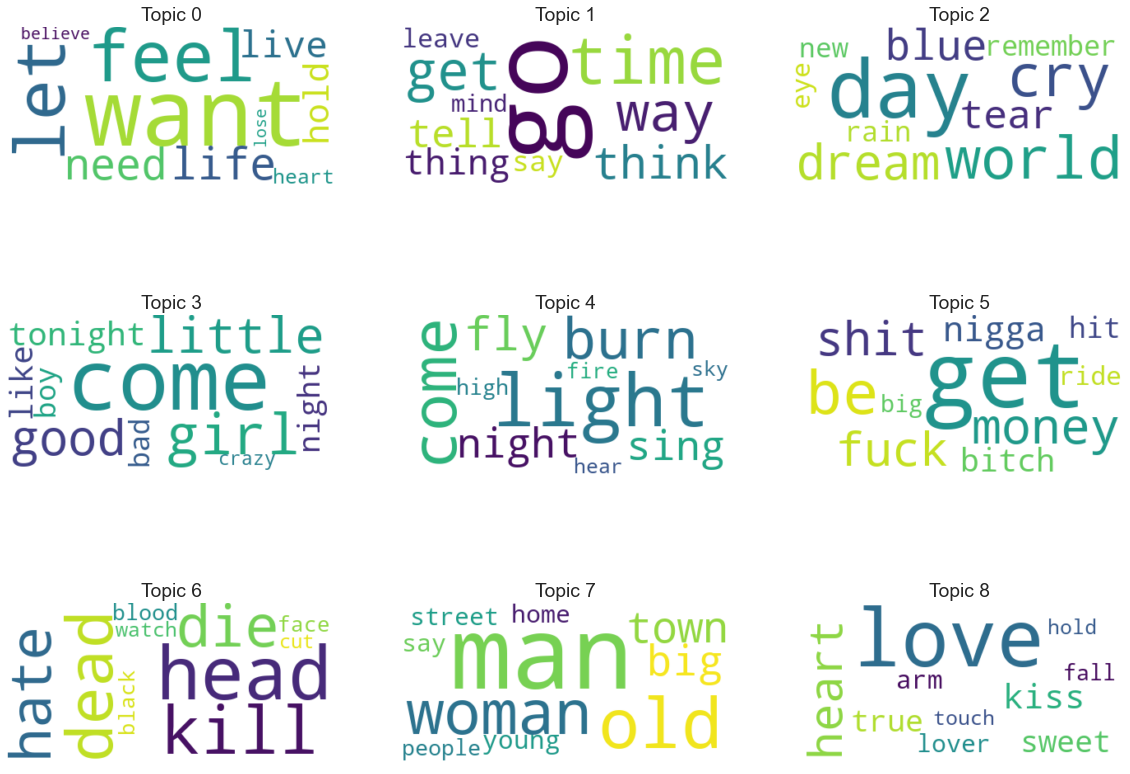

In [ ]:
# Plot word clouds for each topic
word_cloud = WordCloud(background_color='white', max_words=10)
fig, axes = plt.subplots(3, 3, figsize=(20,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(lda_model.show_topic(i))
    word_cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(word_cloud, interpolation='bilinear')
    plt.gca().set_title(f'Topic {i}')
    plt.gca().axis('off')
plt.show()

In [ ]:
# Compute and rank consine similarities
lda_index = similarities.MatrixSimilarity(lda_model[bow], num_features=len(dct))

In [ ]:
# Returns most similar songs to a given song
def get_similar_songs(song_bow, top_n=5, first_m_words=300):
    similar_songs = lda_index[lda_model[song_bow]]
    top_n_docs = sorted(enumerate(similar_songs), key=lambda item: -item[1])[1:top_n+1]
  
    # Returns (song id, similarity score, first_m_words of song)
    return list(map(lambda entry: (entry[0], entry[1], clean_data[entry[0]][:first_m_words]), top_n_docs))

In [ ]:
# Example
print(data[6864][:300],'\n')
get_similar_songs(bow[6864])

[Verse:]  
She's just a girl and she's on fire  
Hotter than a fantasy, lonely like a highway  
She's living in a world and it's on fire  
Filled with catastrophe, but she knows she can fly away  
  
Ohhhh oh oh oh oh  
She got both feet on the ground  
And she's burning it down  
Ohhhh oh  



[(32754,
  0.9933786,
  "It's night, again  Time for my mind to go wandering  Off on a journey, through space and time  In search of a face I can never find  So I close my eyes and look inside    I can't forget  The night that I saw her we never met  She felt so close to me as I reached for her hand  She drifted away like t"),
 (3521,
  0.9896216,
  "I see a bad moon rising.  I see trouble on the way.  I see earthquakes and lightnin'.  I see bad times today.    Don't go around tonight,  Well it's bound to take your life,  There's a bad moon on the rise.    I hear hurricanes a blowing.  I know the end is coming soon.  I fear rivers over flowing. "),
 (652,
  0.98928314,
  "The waves come in  Crash on the shoreline  Salty water, don't you know  It's yours, yours and mine  So grab your girl  And don't go wastin' time  And let's go down to the water tonight    White capped clouds  Dance in the sunlight  Purple fishes watch  And show you some of their delight  The weather"),
 (39328,
  0.98

In [ ]:
# Pass new song through pipeline
new_song = "Demons on my shoulder Monsters in my head Shadow in the water Will you be my friend The world revolves around me As I lay in my bed Dreaming of more, more"
new_tokens = list(map(custom_tokenizer, [nlp(new_song)]))[0]
new_bow = dct.doc2bow(new_tokens)

print(new_song,'\n')
get_similar_songs(new_bow)

Demons on my shoulder Monsters in my head Shadow in the water Will you be my friend The world revolves around me As I lay in my bed Dreaming of more, more 



[(40978,
  0.9896342,
  "Shed my skin since you came in,  Where do you end and I begin?  Awoke my senses yet you stopped time,  You took me to a deeper high,  The essence of my hopes and fears,  Creation of my muddled dreams    Cowboy Style,  With a peaceful smile,  You are from the temple  Won't you stay a while    Found m"),
 (54209,
  0.989293,
  "I'm a rebel, soul rebel  I'm a capturer, soul adventurer  See the morning sun, on the hillside  Not living good, yeah  You better travel wide  You better travel wide  Said I'm a living man  I've got work to do  If you're not happy, children  Then you must be blue  I said, you must be blue  I'm a reb"),
 (12645,
  0.9892339,
  "Three days of spirits  Tell me now  I'm here like a spell  That's bearing me to drive    Tell me now  That there are three days in a week  Tell me now  To make it so  Make it so I can't speak  Make it so I can't speak  Well I'm here like a spell  That's bearing me to drive    Eyes of blue  Sea of re"),
 (6174,
  0.98

In [ ]:
lastfm_api_key = "97d5a64d5ba4a8bc580b752ceff3b87f"
lastfm_secret = "35175090bd61f6f16ac607bd26e5b1de"
base_url = 'http://ws.audioscrobbler.com/2.0/'

def lastfm_get(payload):
    headers = {'user-agent': 'DataCollectorBot'}
    payload['api_key'] = lastfm_api_key
    payload['format'] = 'json'
    response = requests.get(base_url, headers=headers, params=payload)
    return response.json()

def get_song_details(artist_name, track_name):
    payload = {
        'method': 'track.getInfo',
        'artist': artist_name,
        'track': track_name,
    }
    json_response = lastfm_get(payload)
    return json_response.get('track', {})

def get_artist_details(artist_name):
    payload = {
        'method': 'artist.getInfo',
        'artist': artist_name,
    }
    json_response = lastfm_get(payload)
    return json_response.get('artist', {})

def get_recommendations(artist_name, track_name, limit=20):
    payload = {
        'method': 'track.getSimilar',
        'artist': artist_name,
        'track': track_name,
        'limit': limit,
    }
    json_response = lastfm_get(payload)
    return json_response.get('similartracks', {}).get('track', [])